Please note: The exercise here one of my attempts at lesson 234 of the Complete Data Science Bootcamp. The aim of the exercise is to "Take the model we created as a basis and try to improve it", thus I have added elements to the basic regression as it was presented in the tutorial. A lot of the code is a duplicate of the example given in the tutorial but I have added elements in the following sections; Determining the variables of interest, Transform Year to Year^2 and EngineV to EngineV^2, Rearrange a bit, Feature Selection, Drop features with p-value greater than .05 and Finding the adjusted R-sqaured. In summary, I have added Model as an independant variable, made transformations to Year and EngineV, added a feature selection section to exclude some of the non-significant Model dummies and I have added an adjusted R-squared as suggested.

# Practical example

## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('1.04. Real-life example.csv')

# Let's explore the top 5 rows of the df
raw_data.loc[raw_data['Model'] == 'CLK 430']

Brand   Price   Body  Mileage  EngineV Engine Type Registration  \
834  Mercedes-Benz  4100.0  sedan      215      4.3      Petrol           no   

     Year    Model  
834  2001  CLK 430

## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Determining the variables of interest

In [4]:
# For these several lessons, we will create the regression without 'Model'
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
# data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'


# Decsribe the data with 'Model' included as an independant variable but also drop Brand to avoid multicollinearity (perhaps)
#data = raw_data.drop(['Brand'], axis=1)

#now including both Brand and Model
data = raw_data

data.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Dealing with missing values

In [5]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [7]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4025    4025.000000   4025  4025.000000  4025.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1534          NaN          NaN   
mean           NaN   19552.308065    NaN   163.572174     2.764586   
std            NaN   25815.734988    NaN   103.394703     4.935941   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    90.000000     1.800000   
50%            NaN   11500.000000    NaN   158.000000     2.200000   
75%            NaN   21900.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4025         4025  4025.000000     4025  
unique           4            2          NaN      306  
top         Diesel          yes          NaN  E-Class  
freq          1861         3654          NaN      188  
mean           NaN          NaN  2006.379627      NaN  
std            NaN          NaN     6.695595      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2007.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

### Exploring the PDFs

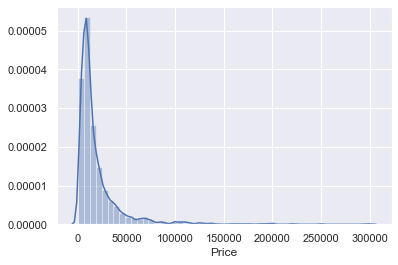

In [8]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [9]:
# Obviously there are some outliers present 

# Without diving too deep into the topic, we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3984    3984.000000   3984  3984.000000  3984.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           880            NaN   1528          NaN          NaN   
mean           NaN   17837.117460    NaN   165.116466     2.743770   
std            NaN   18976.268315    NaN   102.766126     4.956057   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6980.000000    NaN    93.000000     1.800000   
50%            NaN   11400.000000    NaN   160.000000     2.200000   
75%            NaN   21000.000000    NaN   230.000000     3.000000   
max            NaN  129222.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         3984         3984  3984.000000     3984  
unique           4            2          NaN      302  
top         Diesel          yes          NaN  E-Class  
freq          1853         3613          NaN      188  
mean           NaN          NaN  2006.292922      NaN  
std            NaN          NaN     6.672745      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2002.750000      NaN  
50%            NaN          NaN  2007.000000      NaN  
75%            NaN          NaN  2011.000000      NaN  
max            NaN          NaN  2016.000000      NaN

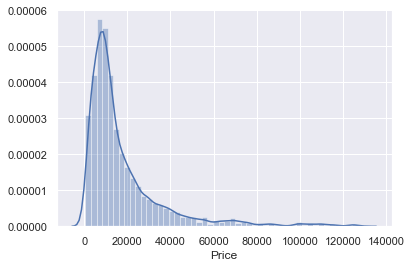

In [10]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

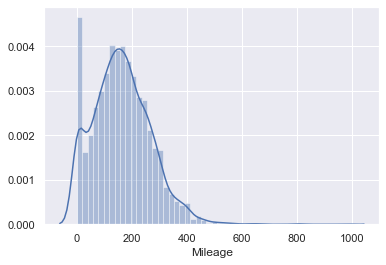

In [11]:
# We can treat the other numerical variables in a similar way
sns.distplot(data_no_mv['Mileage'])

In [12]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

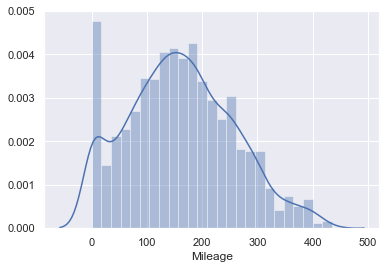

In [13]:
# This plot looks kind of normal, doesn't it?
sns.distplot(data_2['Mileage'])

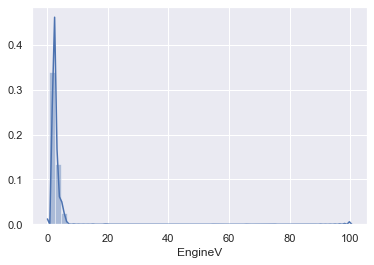

In [14]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like75
sns.distplot(data_no_mv['EngineV'])

In [15]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

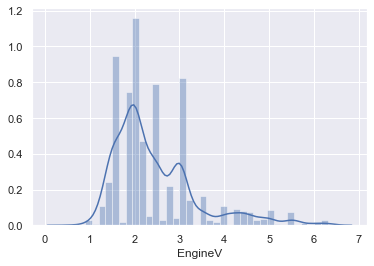

In [16]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

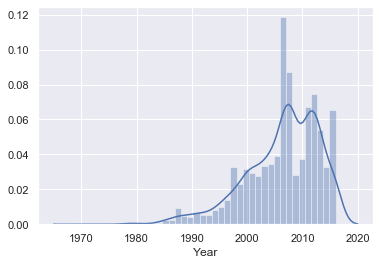

In [17]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [18]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

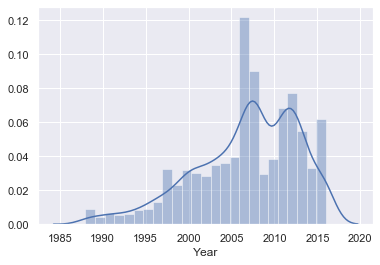

In [19]:
# Here's the new result
sns.distplot(data_4['Year'])

In [20]:
# When we remove observations, the original indexes are preserved
# If we remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as we tend to forget about it (later you will see an example of such a problem)

# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [21]:
# Let's see what's left
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3867    3867.000000   3867  3867.000000  3867.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1467          NaN          NaN   
mean           NaN   18194.455679    NaN   160.542539     2.450440   
std            NaN   19085.855165    NaN    95.633291     0.949366   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    91.000000     1.800000   
50%            NaN   11700.000000    NaN   157.000000     2.200000   
75%            NaN   21700.000000    NaN   225.000000     3.000000   
max            NaN  129222.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year    Model  
count         3867         3867  3867.000000     3867  
unique           4            2          NaN      291  
top         Diesel          yes          NaN  E-Class  
freq          1807         3505          NaN      181  
mean           NaN          NaN  2006.709853      NaN  
std            NaN          NaN     6.103870      NaN  
min            NaN          NaN  1988.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

## Checking the OLS assumptions

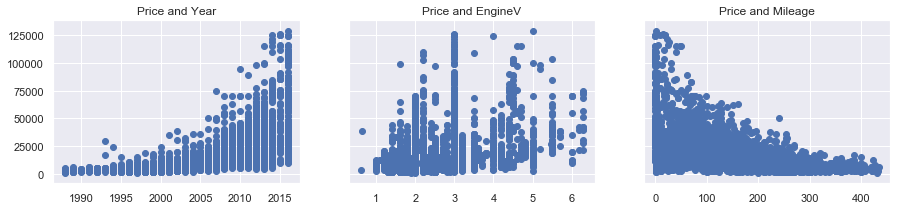

In [22]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

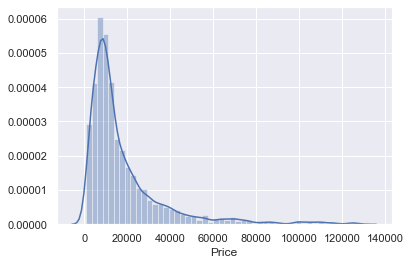

In [23]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [24]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW    4200.0      sedan      277      2.0      Petrol   
1     Mercedes-Benz    7900.0        van      427      2.9      Diesel   
2     Mercedes-Benz   13300.0      sedan      358      5.0         Gas   
3              Audi   23000.0  crossover      240      4.2      Petrol   
4            Toyota   18300.0  crossover      120      2.0      Petrol   
...             ...       ...        ...      ...      ...         ...   
3862     Volkswagen   11500.0        van      163      2.5      Diesel   
3863         Toyota   17900.0      sedan       35      1.6      Petrol   
3864  Mercedes-Benz  125000.0      sedan        9      3.0      Diesel   
3865            BMW    6500.0      sedan        1      3.5      Petrol   
3866     Volkswagen   13500.0        van      124      2.0      Diesel   

     Registration  Year              Model  log_price  
0             yes  1991                320   8.342840  
1             yes  1999       Sprinter 212   8.974618  
2             yes  2003              S 500   9.495519  
3             yes  2007                 Q7  10.043249  
4             yes  2011              Rav 4   9.814656  
...           ...   ...                ...        ...  
3862          yes  2008   T5 (Transporter)   9.350102  
3863          yes  2014            Corolla   9.792556  
3864          yes  2014              S 350  11.736069  
3865          yes  1999                535   8.779557  
3866          yes  2013  T5 (Transporter)    9.510445  

[3867 rows x 10 columns]

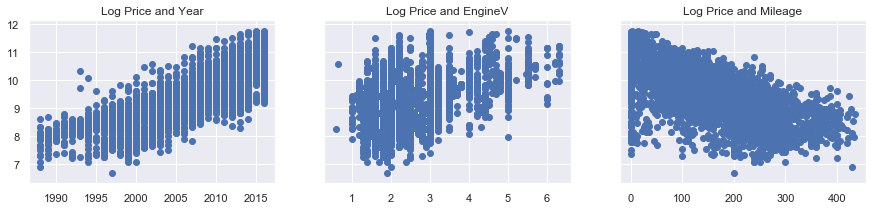

In [25]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [26]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'], axis=1)

## Transform Year to Year^2 and EngineV to EngineV^2

In [27]:
data_cleaned['Year^2'] = np.power(data_cleaned['Year'], 2)
data_cleaned['EngineV^2'] = np.power(data_cleaned['EngineV'], 2)
data_cleaned.head()

Brand       Body  Mileage  EngineV Engine Type Registration  Year  \
0            BMW      sedan      277      2.0      Petrol          yes  1991   
1  Mercedes-Benz        van      427      2.9      Diesel          yes  1999   
2  Mercedes-Benz      sedan      358      5.0         Gas          yes  2003   
3           Audi  crossover      240      4.2      Petrol          yes  2007   
4         Toyota  crossover      120      2.0      Petrol          yes  2011   

          Model  log_price   Year^2  EngineV^2  
0           320   8.342840  3964081       4.00  
1  Sprinter 212   8.974618  3996001       8.41  
2         S 500   9.495519  4012009      25.00  
3            Q7  10.043249  4028049      17.64  
4         Rav 4   9.814656  4044121       4.00

### Multicollinearity

In [28]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price', 'Year^2',
       'EngineV^2'], dtype=object)

In [29]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year^2','EngineV^2']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [30]:
# Let's explore the result
vif

VIF   Features
0  3.764980    Mileage
1  5.108261     Year^2
2  2.271768  EngineV^2

In [31]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case

#No dropping of Year^2 all vifs are in good range but drop Year and EngineV
data_no_multicollinearity = data_cleaned.drop(['Year', "EngineV"], axis=1)
data_no_multicollinearity.head()

Brand       Body  Mileage Engine Type Registration         Model  \
0            BMW      sedan      277      Petrol          yes           320   
1  Mercedes-Benz        van      427      Diesel          yes  Sprinter 212   
2  Mercedes-Benz      sedan      358         Gas          yes         S 500   
3           Audi  crossover      240      Petrol          yes            Q7   
4         Toyota  crossover      120      Petrol          yes         Rav 4   

   log_price   Year^2  EngineV^2  
0   8.342840  3964081       4.00  
1   8.974618  3996001       8.41  
2   9.495519  4012009      25.00  
3  10.043249  4028049      17.64  
4   9.814656  4044121       4.00

## Create dummy variables

In [32]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [33]:
# Here's the result
data_with_dummies.head()

Mileage  log_price   Year^2  EngineV^2  Brand_BMW  Brand_Mercedes-Benz  \
0      277   8.342840  3964081       4.00          1                    0   
1      427   8.974618  3996001       8.41          0                    1   
2      358   9.495519  4012009      25.00          0                    1   
3      240  10.043249  4028049      17.64          0                    0   
4      120   9.814656  4044121       4.00          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  ...  \
0                 0              0             0                 0  ...   
1                 0              0             0                 0  ...   
2                 0              0             0                 0  ...   
3                 0              0             0                 0  ...   
4                 0              0             1                 0  ...   

   Model_Vito  Model_X1  Model_X3  Model_X5  Model_X5 M  Model_X6  Model_X6 M  \
0           0         0         0         0           0         0           0   
1           0         0         0         0           0         0           0   
2           0         0         0         0           0         0           0   
3           0         0         0         0           0         0           0   
4           0         0         0         0           0         0           0   

   Model_Yaris  Model_Z3  Model_Z4  
0            0         0         0  
1            0         0         0  
2            0         0         0  
3            0         0         0  
4            0         0         0  

[5 rows x 309 columns]

### Rearrange a bit

In [34]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'log_price', 'Year^2', 'EngineV^2', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650

In [35]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'Year^2', 'EngineV^2', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [36]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

log_price  Mileage   Year^2  EngineV^2  Brand_BMW  Brand_Mercedes-Benz  \
0   8.342840      277  3964081       4.00          1                    0   
1   8.974618      427  3996001       8.41          0                    1   
2   9.495519      358  4012009      25.00          0                    1   
3  10.043249      240  4028049      17.64          0                    0   
4   9.814656      120  4044121       4.00          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  ...  \
0                 0              0             0                 0  ...   
1                 0              0             0                 0  ...   
2                 0              0             0                 0  ...   
3                 0              0             0                 0  ...   
4                 0              0             1                 0  ...   

   Model_Vito  Model_X1  Model_X3  Model_X5  Model_X5 M  Model_X6  Model_X6 M  \
0           0         0         0         0           0         0           0   
1           0         0         0         0           0         0           0   
2           0         0         0         0           0         0           0   
3           0         0         0         0           0         0           0   
4           0         0         0         0           0         0           0   

   Model_Yaris  Model_Z3  Model_Z4  
0            0         0         0  
1            0         0         0  
2            0         0         0  
3            0         0         0  
4            0         0         0  

[5 rows x 309 columns]

## Linear regression model

### Declare the inputs and the targets

In [37]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

#  Feature selection (univariate p-values)

In [38]:
from sklearn.feature_selection import f_regression
p_values = f_regression(inputs, targets)[1]
p_values.round(3)


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.034, 0.   , 0.   , 0.   , 0.   , 0.055, 0.008, 0.   ,
       0.   , 0.028, 0.916, 0.999, 0.152, 0.01 , 0.002, 0.008, 0.106,
       0.452, 0.042, 0.004, 0.37 , 0.084, 0.003, 0.   , 0.   , 0.457,
       0.943, 0.706, 0.255, 0.404, 0.099, 0.203, 0.161, 0.091, 0.026,
       0.075, 0.191, 0.1  , 0.   , 0.141, 0.031, 0.114, 0.071, 0.628,
       0.001, 0.027, 0.49 , 0.   , 0.34 , 0.506, 0.597, 0.274, 0.946,
       0.529, 0.   , 0.443, 0.   , 0.008, 0.152, 0.014, 0.765, 0.   ,
       0.337, 0.649, 0.514, 0.   , 0.094, 0.   , 0.   , 0.425, 0.003,
       0.07 , 0.288, 0.194, 0.825, 0.819, 0.481, 0.514, 0.969, 0.268,
       0.742, 0.19 , 0.032, 0.498, 0.022, 0.339, 0.036, 0.232, 0.004,
       0.058, 0.161, 0.192, 0.627, 0.663, 0.059, 0.521, 0.1  , 0.802,
       0.506, 0.769, 0.211, 0.079, 0.017, 0.012, 0.022, 0.   , 0.017,
       0.469, 0.462, 0.01 , 0.001, 0.525, 0.027, 0.004, 0.003, 0.574,
       0.956, 0.695,

In [39]:
#create p-values summary table
selection_summary = pd.DataFrame(cols[1:], columns = ['Features'])

selection_summary['P-values'] = p_values.round(3)
selection_summary


Features  P-values
0                Mileage     0.000
1                 Year^2     0.000
2              EngineV^2     0.000
3              Brand_BMW     0.000
4    Brand_Mercedes-Benz     0.000
..                   ...       ...
303             Model_X6     0.000
304           Model_X6 M     0.001
305          Model_Yaris     0.043
306             Model_Z3     0.305
307             Model_Z4     0.082

[308 rows x 2 columns]

# Drop features with p-value greater than .05

In [40]:
features_to_drop = selection_summary.loc[selection_summary['P-values'] > .05]
inputs_selected = inputs.drop(features_to_drop['Features'], axis=1)
inputs_selected.shape

(3867, 131)

### Scale the data

In [41]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs_selected)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs_selected)

### Train Test Split

In [43]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [44]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

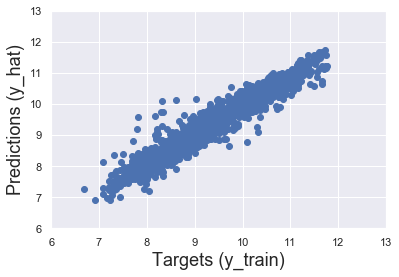

In [46]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

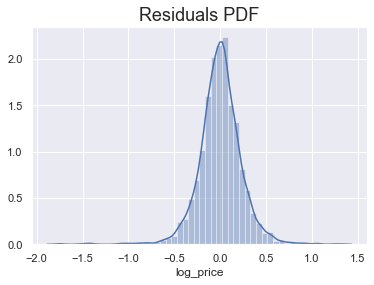

In [47]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [48]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.9269461320367132

# Finding the adjusted R-sqaured

In [49]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
r2 = reg.score(x_train, y_train)
# Number of observations is the shape along axis 0
n = x_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = x_train.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.9237140966759598

### Finding the weights and bias

In [50]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.376697629764154

In [51]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-7.69989352e-02,  5.14574530e-01,  1.28710194e-01,  2.25598782e-02,
       -1.35840211e-02, -1.43428794e-01, -2.55412414e-01, -8.47507899e-02,
       -1.69342326e-01, -7.86185914e-02, -4.10580461e-02, -9.35206891e-02,
       -7.30700361e-02, -6.96230098e-02, -3.32643052e-02, -4.67141764e-02,
        2.55791618e-01,  7.33333411e-04, -2.46699879e+00,  4.40774881e-03,
        8.77747334e-03, -5.58826597e-03,  5.38553411e-03, -1.67419077e-03,
       -1.07988120e-02, -1.55256108e-02, -1.23384773e-02,  7.26858103e-03,
       -1.42537424e-02, -1.24961492e-02,  1.44075019e-02,  1.06705225e-02,
        2.13730530e-02,  1.18537398e-02, -7.55366876e-03, -8.11591639e-04,
       -7.46695563e-03, -7.69092660e-03, -2.19600495e-02,  9.68919799e-03,
       -2.24167771e-02,  1.35751744e-02, -1.03197553e-03, -3.38362454e-03,
        3.99926079e-03,  1.10948192e-02,  1.46265088e-02,  1.03682600e-02,
        3.92530617e-03, -6.62596723e-02, -6.44775063e-03, -2.10893050e-03,
        4.10986382e-03, -

In [52]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs_selected.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_.round(3)

# set pandas to display all rows


reg_summary

Features  Weights
0                Mileage   -0.077
1                 Year^2    0.515
2              EngineV^2    0.129
3              Brand_BMW    0.023
4    Brand_Mercedes-Benz   -0.014
..                   ...      ...
126             Model_X5    0.009
127           Model_X5 M    0.013
128             Model_X6    0.024
129           Model_X6 M    0.009
130          Model_Yaris   -0.023

[131 rows x 2 columns]

In [53]:
# Check the different categories in the 'Brand' variable
#data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark


## Testing

In [54]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

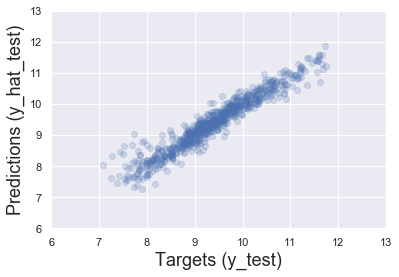

In [55]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [56]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test).round(3), columns=['Prediction'])
df_pf

Prediction
0      8411.574
1      3504.309
2      1973.511
3      6617.114
4      9020.702
..          ...
769   33316.960
770   10054.397
771   20338.381
772   34326.302
773   11829.587

[774 rows x 1 columns]

In [57]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

Prediction  Target
0      8411.574     NaN
1      3504.309  7900.0
2      1973.511     NaN
3      6617.114     NaN
4      9020.702     NaN
..          ...     ...
769   33316.960  6950.0
770   10054.397     NaN
771   20338.381     NaN
772   34326.302     NaN
773   11829.587     NaN

[774 rows x 2 columns]

In [58]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [59]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction   Target
0      8411.574   2300.0
1      3504.309   2800.0
2      1973.511   2500.0
3      6617.114   6400.0
4      9020.702   9150.0
..          ...      ...
769   33316.960  29500.0
770   10054.397   9600.0
771   20338.381  18300.0
772   34326.302  68500.0
773   11829.587  10800.0

[774 rows x 2 columns]

In [60]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [61]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

Prediction   Target   Residual  Difference%
0      8411.574   2300.0  -6111.574   265.720609
1      3504.309   2800.0   -704.309    25.153893
2      1973.511   2500.0    526.489    21.059560
3      6617.114   6400.0   -217.114     3.392406
4      9020.702   9150.0    129.298     1.413093
..          ...      ...        ...          ...
769   33316.960  29500.0  -3816.960    12.938847
770   10054.397   9600.0   -454.397     4.733302
771   20338.381  18300.0  -2038.381    11.138694
772   34326.302  68500.0  34173.698    49.888610
773   11829.587  10800.0  -1029.587     9.533213

[774 rows x 4 columns]

In [62]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

Prediction         Target      Residual  Difference%
count     774.000000     774.000000    774.000000   774.000000
mean    17415.567647   18165.817106    750.249459    18.995965
std     17302.615881   19967.858908   6542.385646    23.417912
min         0.000000    1200.000000 -23352.342000     0.034034
25%      6560.132750    6900.000000  -1514.545000     5.939949
50%     11778.076500   11600.000000     17.125000    13.599929
75%     21536.097750   20500.000000   1404.914000    22.907458
max    143648.261000  126000.000000  68153.563000   265.720609

In [63]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
#pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

Prediction   Target  Residual  Difference%
353    20393.06 20400.00      6.94         0.03
568    10994.96 11000.00      5.04         0.05
765     9810.18  9800.00    -10.18         0.10
54     20923.83 20900.00    -23.83         0.11
631     8489.25  8500.00     10.75         0.13
..          ...      ...       ...          ...
492     5839.16  2200.00  -3639.16       165.42
664     4627.51  1700.00  -2927.51       172.21
635     4057.17  1450.00  -2607.17       179.81
629     5718.22  1850.00  -3868.22       209.09
0       8411.57  2300.00  -6111.57       265.72

[774 rows x 4 columns]